In [1]:
import json 
import pickle

import os
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

from tqdm import tqdm, notebook

import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

# from preprocess import feature_select, sample_generate , replace_outlier
# from scaling import standardize_select, normalize_select
# from load import dataloader

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [3]:
#ensemble
results_ran_es = pd.read_pickle('./logs/validation_results1_ensemble_Ran.pkl')
results_knn_es = pd.read_pickle('./logs/validation_results1_ensemble_KNN.pkl')
results_log_es = pd.read_pickle('./logs/validation_results1_ensemble_Log.pkl')
results_svc_es = pd.read_pickle('./logs/validation_results1_ensemble_SVC.pkl')
results_ada_es = pd.read_pickle('./logs/validation_results1_ensemble_Ada.pkl')
results_gnb_es = pd.read_pickle('./logs/validation_results1_ensemble_GNB.pkl')
results_bag_es = pd.read_pickle('./logs/validation_results1_ensemble_Bag.pkl')
#feature importances_ext
results_ran_fi_ext = pd.read_pickle('./logs/validation_results1_feature_importances_ext_Ran.pkl')
results_knn_fi_ext = pd.read_pickle('./logs/validation_results1_feature_importances_ext_KNN.pkl')
results_log_fi_ext = pd.read_pickle('./logs/validation_results1_feature_importances_ext_Log.pkl')
results_svc_fi_ext = pd.read_pickle('./logs/validation_results1_feature_importances_ext_SVC.pkl')
results_ada_fi_ext = pd.read_pickle('./logs/validation_results1_feature_importances_ext_Ada.pkl')
results_gnb_fi_ext = pd.read_pickle('./logs/validation_results1_feature_importances_ext_GNB.pkl')
results_bag_fi_ext = pd.read_pickle('./logs/validation_results1_feature_importances_ext_Bag.pkl')
#feature importances_rf
results_ran_fi_rf = pd.read_pickle('./logs/validation_results1_feature_importances_rf_Ran.pkl')
results_knn_fi_rf = pd.read_pickle('./logs/validation_results1_feature_importances_rf_KNN.pkl')
results_log_fi_rf = pd.read_pickle('./logs/validation_results1_feature_importances_rf_Log.pkl')
results_svc_fi_rf = pd.read_pickle('./logs/validation_results1_feature_importances_rf_SVC.pkl')
results_ada_fi_rf = pd.read_pickle('./logs/validation_results1_feature_importances_rf_Ada.pkl')
results_gnb_fi_rf = pd.read_pickle('./logs/validation_results1_feature_importances_rf_GNB.pkl')
results_bag_fi_rf = pd.read_pickle('./logs/validation_results1_feature_importances_rf_Bag.pkl')
#rfe_log
results_ran_rfe_log = pd.read_pickle('./logs/validation_results1_rfe_log_Ran.pkl')
results_knn_rfe_log = pd.read_pickle('./logs/validation_results1_rfe_log_KNN.pkl')
results_log_rfe_log = pd.read_pickle('./logs/validation_results1_rfe_log_Log.pkl')
results_svc_rfe_log = pd.read_pickle('./logs/validation_results1_rfe_log_SVC.pkl')
results_ada_rfe_log = pd.read_pickle('./logs/validation_results1_rfe_log_Ada.pkl')
results_gnb_rfe_log = pd.read_pickle('./logs/validation_results1_rfe_log_GNB.pkl')
results_bag_rfe_log = pd.read_pickle('./logs/validation_results1_rfe_log_Bag.pkl')
#rfe_rf
results_ran_rfe_rf = pd.read_pickle('./logs/validation_results1_rfe_rf_Ran.pkl')
results_knn_rfe_rf = pd.read_pickle('./logs/validation_results1_rfe_rf_KNN.pkl')
results_log_rfe_rf = pd.read_pickle('./logs/validation_results1_rfe_rf_Log.pkl')
results_svc_rfe_rf = pd.read_pickle('./logs/validation_results1_rfe_rf_SVC.pkl')
results_ada_rfe_rf = pd.read_pickle('./logs/validation_results1_rfe_rf_Ada.pkl')
results_gnb_rfe_rf = pd.read_pickle('./logs/validation_results1_rfe_rf_GNB.pkl')
results_bag_rfe_rf = pd.read_pickle('./logs/validation_results1_rfe_rf_Bag.pkl')
#selectkbest_f
results_ran_sk_f = pd.read_pickle('./logs/validation_results1_SelectKBest_f_Ran.pkl')
results_knn_sk_f = pd.read_pickle('./logs/validation_results1_SelectKBest_f_KNN.pkl')
results_log_sk_f = pd.read_pickle('./logs/validation_results1_SelectKBest_f_Log.pkl')
results_svc_sk_f = pd.read_pickle('./logs/validation_results1_SelectKBest_f_SVC.pkl')
results_ada_sk_f = pd.read_pickle('./logs/validation_results1_SelectKBest_f_Ada.pkl')
results_gnb_sk_f = pd.read_pickle('./logs/validation_results1_SelectKBest_f_GNB.pkl')
results_bag_sk_f = pd.read_pickle('./logs/validation_results1_SelectKBest_f_Bag.pkl')
#selectkbest_chi2
results_ran_sk_chi2 = pd.read_pickle('./logs/validation_results1_SelectKBest_chi2_Ran.pkl')
results_knn_sk_chi2 = pd.read_pickle('./logs/validation_results1_SelectKBest_chi2_KNN.pkl')
results_log_sk_chi2 = pd.read_pickle('./logs/validation_results1_SelectKBest_chi2_Log.pkl')
results_svc_sk_chi2 = pd.read_pickle('./logs/validation_results1_SelectKBest_chi2_SVC.pkl')
results_ada_sk_chi2 = pd.read_pickle('./logs/validation_results1_SelectKBest_chi2_Ada.pkl')
results_gnb_sk_chi2 = pd.read_pickle('./logs/validation_results1_SelectKBest_chi2_GNB.pkl')
results_bag_sk_chi2 = pd.read_pickle('./logs/validation_results1_SelectKBest_chi2_Bag.pkl')

#shap1
results_ran_sh1 = pd.read_pickle('./logs/validation_results1_shap1_Ran.pkl')
results_knn_sh1= pd.read_pickle('./logs/validation_results1_shap1_KNN.pkl')
results_log_sh1 = pd.read_pickle('./logs/validation_results1_shap1_Log.pkl')
results_svc_sh1 = pd.read_pickle('./logs/validation_results1_shap1_SVC.pkl')
results_ada_sh1 = pd.read_pickle('./logs/validation_results1_shap1_Ada.pkl')
results_gnb_sh1 = pd.read_pickle('./logs/validation_results1_shap1_GNB.pkl')
results_bag_sh1 = pd.read_pickle('./logs/validation_results1_shap1_Bag.pkl')
#shap2
results_ran_sh2 = pd.read_pickle('./logs/validation_results1_shap2_Ran.pkl')
results_knn_sh2= pd.read_pickle('./logs/validation_results1_shap2_KNN.pkl')
results_log_sh2 = pd.read_pickle('./logs/validation_results1_shap2_Log.pkl')
results_svc_sh2 = pd.read_pickle('./logs/validation_results1_shap2_SVC.pkl')
results_ada_sh2 = pd.read_pickle('./logs/validation_results1_shap2_Ada.pkl')
results_gnb_sh2 = pd.read_pickle('./logs/validation_results1_shap2_GNB.pkl')
results_bag_sh2 = pd.read_pickle('./logs/validation_results1_shap2_Bag.pkl')
#ensemble2
results_ran_es2 = pd.read_pickle('./logs/validation_results1_ensemble2_Ran.pkl')
results_knn_es2 = pd.read_pickle('./logs/validation_results1_ensemble2_KNN.pkl')
results_log_es2 = pd.read_pickle('./logs/validation_results1_ensemble2_Log.pkl')
results_svc_es2 = pd.read_pickle('./logs/validation_results1_ensemble2_SVC.pkl')
results_ada_es2 = pd.read_pickle('./logs/validation_results1_ensemble2_Ada.pkl')
results_gnb_es2 = pd.read_pickle('./logs/validation_results1_ensemble2_GNB.pkl')
results_bag_es2 = pd.read_pickle('./logs/validation_results1_ensemble2_Bag.pkl')
#regularization_l1
results_ran_regular_l1 = pd.read_pickle('./logs/validation_results1_regularization_l1_Ran.pkl')
results_knn_regular_l1 = pd.read_pickle('./logs/validation_results1_regularization_l1_KNN.pkl')
results_log_regular_l1 = pd.read_pickle('./logs/validation_results1_regularization_l1_Log.pkl')
results_svc_regular_l1 = pd.read_pickle('./logs/validation_results1_regularization_l1_SVC.pkl')
results_ada_regular_l1 = pd.read_pickle('./logs/validation_results1_regularization_l1_Ada.pkl')
results_gnb_regular_l1 = pd.read_pickle('./logs/validation_results1_regularization_l1_GNB.pkl')
results_bag_regular_l1 = pd.read_pickle('./logs/validation_results1_regularization_l1_Bag.pkl')
#regularizaion_l2
results_ran_regular_l2 = pd.read_pickle('./logs/validation_results1_regularization_l2_Ran.pkl')
results_knn_regular_l2 = pd.read_pickle('./logs/validation_results1_regularization_l2_KNN.pkl')
results_log_regular_l2 = pd.read_pickle('./logs/validation_results1_regularization_l2_Log.pkl')
results_svc_regular_l2 = pd.read_pickle('./logs/validation_results1_regularization_l2_SVC.pkl')
results_ada_regular_l2 = pd.read_pickle('./logs/validation_results1_regularization_l2_Ada.pkl')
results_gnb_regular_l2 = pd.read_pickle('./logs/validation_results1_regularization_l2_GNB.pkl')
results_bag_regular_l2 = pd.read_pickle('./logs/validation_results1_regularization_l2_Bag.pkl')
#ensemble1_resampling
results_ran_es1_rs = pd.read_pickle('./logs/validation_results1_ensemble1_resampling_Ran.pkl')
results_knn_es1_rs = pd.read_pickle('./logs/validation_results1_ensemble1_resampling_KNN.pkl')
results_log_es1_rs = pd.read_pickle('./logs/validation_results1_ensemble1_resampling_Log.pkl')
results_svc_es1_rs = pd.read_pickle('./logs/validation_results1_ensemble1_resampling_SVC.pkl')
results_ada_es1_rs = pd.read_pickle('./logs/validation_results1_ensemble1_resampling_Ada.pkl')
results_gnb_es1_rs = pd.read_pickle('./logs/validation_results1_ensemble1_resampling_GNB.pkl')
results_bag_es1_rs = pd.read_pickle('./logs/validation_results1_ensemble1_resampling_Bag.pkl')
#ensemble2_resampling
results_ran_es2_rs = pd.read_pickle('./logs/validation_results1_ensemble2_resampling_Ran.pkl')
results_knn_es2_rs = pd.read_pickle('./logs/validation_results1_ensemble2_resampling_KNN.pkl')
results_log_es2_rs = pd.read_pickle('./logs/validation_results1_ensemble2_resampling_Log.pkl')
results_svc_es2_rs = pd.read_pickle('./logs/validation_results1_ensemble2_resampling_SVC.pkl')
results_ada_es2_rs = pd.read_pickle('./logs/validation_results1_ensemble2_resampling_Ada.pkl')
results_gnb_es2_rs = pd.read_pickle('./logs/validation_results1_ensemble2_resampling_GNB.pkl')
results_bag_es2_rs = pd.read_pickle('./logs/validation_results1_ensemble2_resampling_Bag.pkl')
#resampling1_weight
results_ran_rs_weight = pd.read_pickle('./logs/validation_results1_resampling1_weight_Ran.pkl')
results_knn_rs_weight = pd.read_pickle('./logs/validation_results1_resampling1_weight_KNN.pkl')
results_log_rs_weight = pd.read_pickle('./logs/validation_results1_resampling1_weight_Log.pkl')
results_svc_rs_weight = pd.read_pickle('./logs/validation_results1_resampling1_weight_SVC.pkl')
results_ada_rs_weight = pd.read_pickle('./logs/validation_results1_resampling1_weight_Ada.pkl')
results_gnb_rs_weight = pd.read_pickle('./logs/validation_results1_resampling1_weight_GNB.pkl')
results_bag_rs_weight = pd.read_pickle('./logs/validation_results1_resampling1_weight_Bag.pkl')


In [42]:
# rank method 'average' & accuracy_val ** 2  (resampling 30)
df_results_rs_weight = pd.concat([results_ran_rs_weight, results_knn_rs_weight, results_log_rs_weight, results_svc_rs_weight, results_ada_rs_weight, results_gnb_rs_weight, results_bag_rs_weight])

df_acc_rs_weight = df_results_rs_weight.pivot_table(index = 'model', columns = 'iter')['val_acc'].reset_index()
df_acc_rs_weight['mean'] = np.mean(df_acc_rs_weight, axis = 1)
df_acc_rs_weight['fsmethod'] = 'resampling1_weight'
df_acc_rs_weight.set_index('fsmethod',inplace = True)

In [43]:
df_acc_rs_weight

iter,model,0,1,2,3,4,mean
fsmethod,,,,,,,
resampling1_weight,Ada,0.862745,0.852941,0.857843,0.778325,0.817734,0.833918
resampling1_weight,Bag,0.852941,0.862745,0.843137,0.807882,0.837438,0.840829
resampling1_weight,GNB,0.857843,0.818627,0.838235,0.802956,0.827586,0.829050
resampling1_weight,KNN,0.843137,0.857843,0.857843,0.783251,0.832512,0.834917
resampling1_weight,Log,0.862745,0.833333,0.848039,0.793103,0.827586,0.832961
resampling1_weight,Ran,0.852941,0.852941,0.867647,0.802956,0.852217,0.845740
resampling1_weight,SVC,0.857843,0.843137,0.857843,0.793103,0.832512,0.836888


In [6]:
df_results_sk_f = pd.concat([results_ran_sk_f, results_knn_sk_f, results_log_sk_f, results_svc_sk_f, results_ada_sk_f, results_gnb_sk_f, results_bag_sk_f])

import numpy as np

df_acc_sk_f = df_results_sk_f.pivot_table(index = 'model', columns = 'iter')['val_acc'].reset_index()
df_acc_sk_f['mean'] = np.mean(df_acc_sk_f, axis = 1)
df_acc_sk_f['fsmethod'] = 'selectkbest_f'
df_acc_sk_f.set_index('fsmethod',inplace = True)

In [7]:
df_acc_sk_f

iter,model,0,1,2,3,4,mean
fsmethod,,,,,,,
selectkbest_f,Ada,0.867647,0.833333,0.833333,0.842365,0.832512,0.841838
selectkbest_f,Bag,0.848039,0.828431,0.848039,0.793103,0.852217,0.833966
selectkbest_f,GNB,0.867647,0.857843,0.852941,0.817734,0.832512,0.845736
selectkbest_f,KNN,0.857843,0.852941,0.857843,0.827586,0.866995,0.852642
selectkbest_f,Log,0.872549,0.867647,0.848039,0.822660,0.852217,0.852622
selectkbest_f,Ran,0.857843,0.867647,0.867647,0.827586,0.827586,0.849662
selectkbest_f,SVC,0.857843,0.867647,0.852941,0.832512,0.847291,0.851647


In [8]:
df_results_sk_chi2 = pd.concat([results_ran_sk_chi2, results_knn_sk_chi2, results_log_sk_chi2, results_svc_sk_chi2, results_ada_sk_chi2, results_gnb_sk_chi2, results_bag_sk_chi2])

import numpy as np

df_acc_sk_chi2 = df_results_sk_chi2.pivot_table(index = 'model', columns = 'iter')['val_acc'].reset_index()
df_acc_sk_chi2['mean'] = np.mean(df_acc_sk_chi2, axis = 1)
df_acc_sk_chi2['fsmethod'] = 'selectkbest_chi2'
df_acc_sk_chi2.set_index('fsmethod',inplace = True)

In [9]:
df_acc_sk_chi2

iter,model,0,1,2,3,4,mean
fsmethod,,,,,,,
selectkbest_chi2,Ada,0.848039,0.838235,0.843137,0.822660,0.788177,0.828050
selectkbest_chi2,Bag,0.892157,0.857843,0.867647,0.827586,0.832512,0.855549
selectkbest_chi2,GNB,0.843137,0.833333,0.818627,0.793103,0.827586,0.823158
selectkbest_chi2,KNN,0.838235,0.828431,0.882353,0.778325,0.783251,0.822119
selectkbest_chi2,Log,0.857843,0.848039,0.852941,0.793103,0.842365,0.838858
selectkbest_chi2,Ran,0.882353,0.877451,0.892157,0.822660,0.807882,0.856501
selectkbest_chi2,SVC,0.862745,0.843137,0.852941,0.807882,0.832512,0.839844


In [10]:
df_results_fi_ext = pd.concat([results_ran_fi_ext, results_knn_fi_ext, results_log_fi_ext, results_svc_fi_ext, results_ada_fi_ext, results_gnb_fi_ext, results_bag_fi_ext])


df_acc_fi_ext = df_results_fi_ext.pivot_table(index = 'model', columns = 'iter')['val_acc'].reset_index()
df_acc_fi_ext['mean'] = np.mean(df_acc_fi_ext, axis = 1)
df_acc_fi_ext['fsmethod'] = 'feature_importances_ext'
df_acc_fi_ext.set_index('fsmethod', inplace = True)

In [11]:
df_acc_fi_ext

iter,model,0,1,2,3,4,mean
fsmethod,,,,,,,
feature_importances_ext,Ada,0.852941,0.852941,0.818627,0.832512,0.827586,0.836922
feature_importances_ext,Bag,0.867647,0.843137,0.848039,0.802956,0.788177,0.829991
feature_importances_ext,GNB,0.823529,0.808824,0.799020,0.773399,0.817734,0.804501
feature_importances_ext,KNN,0.843137,0.838235,0.838235,0.837438,0.802956,0.832000
feature_importances_ext,Log,0.823529,0.808824,0.823529,0.793103,0.807882,0.811374
feature_importances_ext,Ran,0.887255,0.843137,0.843137,0.822660,0.842365,0.847711
feature_importances_ext,SVC,0.862745,0.828431,0.833333,0.802956,0.822660,0.830025


In [12]:
df_results_fi_rf = pd.concat([results_ran_fi_rf, results_knn_fi_rf, results_log_fi_rf, results_svc_fi_rf, results_ada_fi_rf, results_gnb_fi_rf, results_bag_fi_rf])


df_acc_fi_rf = df_results_fi_rf.pivot_table(index = 'model', columns = 'iter')['val_acc'].reset_index()
df_acc_fi_rf['mean'] = np.mean(df_acc_fi_rf, axis = 1)
df_acc_fi_rf['fsmethod'] = 'feature_importances_rf'
df_acc_fi_rf.set_index('fsmethod', inplace = True)

In [13]:
df_acc_fi_rf

iter,model,0,1,2,3,4,mean
fsmethod,,,,,,,
feature_importances_rf,Ada,0.857843,0.843137,0.843137,0.827586,0.827586,0.839858
feature_importances_rf,Bag,0.862745,0.862745,0.843137,0.827586,0.837438,0.846730
feature_importances_rf,GNB,0.862745,0.852941,0.813725,0.822660,0.807882,0.831991
feature_importances_rf,KNN,0.843137,0.848039,0.828431,0.837438,0.832512,0.837912
feature_importances_rf,Log,0.862745,0.857843,0.838235,0.798030,0.817734,0.834917
feature_importances_rf,Ran,0.877451,0.862745,0.852941,0.812808,0.847291,0.850647
feature_importances_rf,SVC,0.867647,0.857843,0.838235,0.817734,0.832512,0.842794


In [14]:
df_results_es2 = pd.concat([results_ran_es2, results_knn_es2, results_log_es2, results_svc_es2, results_ada_es2, results_gnb_es2, results_bag_es2])

import numpy as np

df_acc_es2 = df_results_es2.pivot_table(index = 'model', columns = 'iter')['val_acc'].reset_index()
df_acc_es2['mean'] = np.mean(df_acc_es2, axis = 1)
df_acc_es2['fsmethod'] = 'ensemble2'
df_acc_es2.set_index('fsmethod',inplace = True)

In [15]:
df_acc_es2

iter,model,0,1,2,3,4,mean
fsmethod,,,,,,,
ensemble2,Ada,0.823529,0.813725,0.828431,0.827586,0.817734,0.822201
ensemble2,Bag,0.833333,0.838235,0.887255,0.822660,0.842365,0.844770
ensemble2,GNB,0.808824,0.852941,0.843137,0.807882,0.812808,0.825118
ensemble2,KNN,0.848039,0.813725,0.852941,0.817734,0.807882,0.828064
ensemble2,Log,0.789216,0.828431,0.843137,0.793103,0.798030,0.810383
ensemble2,Ran,0.852941,0.872549,0.872549,0.852217,0.866995,0.863450
ensemble2,SVC,0.833333,0.848039,0.848039,0.793103,0.837438,0.831991


In [16]:
df_results_es1 = pd.concat([results_ran_es, results_knn_es, results_log_es, results_svc_es, results_ada_es, results_gnb_es, results_bag_es])

df_acc_es = df_results_es1.pivot_table(index = 'model', columns = 'iter')['val_acc'].reset_index()
df_acc_es['mean'] = np.mean(df_acc_es, axis = 1)
df_acc_es['fsmethod'] = 'ensemble1'
df_acc_es.set_index('fsmethod',inplace = True)

In [17]:
df_acc_es

iter,model,0,1,2,3,4,mean
fsmethod,,,,,,,
ensemble1,Ada,0.828431,0.833333,0.877451,0.798030,0.812808,0.830011
ensemble1,Bag,0.843137,0.813725,0.848039,0.802956,0.847291,0.831030
ensemble1,GNB,0.833333,0.828431,0.848039,0.812808,0.802956,0.825113
ensemble1,KNN,0.848039,0.838235,0.872549,0.827586,0.827586,0.842799
ensemble1,Log,0.843137,0.799020,0.877451,0.798030,0.812808,0.826089
ensemble1,Ran,0.843137,0.877451,0.862745,0.802956,0.837438,0.844745
ensemble1,SVC,0.852941,0.857843,0.862745,0.822660,0.827586,0.844755


In [18]:
df_results_rfe_log = pd.concat([results_ran_rfe_log, results_knn_rfe_log, results_log_rfe_log, results_svc_rfe_log, results_ada_rfe_log, results_gnb_rfe_log, results_bag_rfe_log])

import numpy as np

df_acc_rfe_log = df_results_rfe_log.pivot_table(index = 'model', columns = 'iter')['val_acc'].reset_index()
df_acc_rfe_log['mean'] = np.mean(df_acc_rfe_log, axis = 1)
df_acc_rfe_log['fsmethod'] = 'rfe_log'
df_acc_rfe_log.set_index('fsmethod', inplace = True)

In [19]:
df_acc_rfe_log

iter,model,0,1,2,3,4,mean
fsmethod,,,,,,,
rfe_log,Ada,0.818627,0.750000,0.818627,0.748768,0.817734,0.790751
rfe_log,Bag,0.823529,0.764706,0.843137,0.714286,0.847291,0.798590
rfe_log,GNB,0.818627,0.725490,0.823529,0.689655,0.842365,0.779933
rfe_log,KNN,0.818627,0.720588,0.843137,0.763547,0.832512,0.795682
rfe_log,Log,0.808824,0.740196,0.838235,0.753695,0.832512,0.794692
rfe_log,Ran,0.818627,0.843137,0.862745,0.827586,0.783251,0.827069
rfe_log,SVC,0.813725,0.774510,0.848039,0.768473,0.847291,0.810408


In [20]:
df_results_rfe_rf = pd.concat([results_ran_rfe_rf, results_knn_rfe_rf, results_log_rfe_rf, results_svc_rfe_rf, results_ada_rfe_log, results_gnb_rfe_log, results_bag_rfe_rf])

import numpy as np

df_acc_rfe_rf = df_results_rfe_rf.pivot_table(index = 'model', columns = 'iter')['val_acc'].reset_index()
df_acc_rfe_rf['mean'] = np.mean(df_acc_rfe_rf, axis = 1)
df_acc_rfe_rf['fsmethod'] = 'rfe_rf'
df_acc_rfe_rf.set_index('fsmethod', inplace = True)

In [21]:
df_acc_rfe_rf

iter,model,0,1,2,3,4,mean
fsmethod,,,,,,,
rfe_rf,Ada,0.818627,0.750000,0.818627,0.748768,0.817734,0.790751
rfe_rf,Bag,0.852941,0.867647,0.877451,0.817734,0.817734,0.846701
rfe_rf,GNB,0.818627,0.725490,0.823529,0.689655,0.842365,0.779933
rfe_rf,KNN,0.848039,0.848039,0.833333,0.822660,0.817734,0.833961
rfe_rf,Log,0.867647,0.828431,0.779412,0.798030,0.798030,0.814310
rfe_rf,Ran,0.882353,0.877451,0.862745,0.832512,0.842365,0.859485
rfe_rf,SVC,0.857843,0.843137,0.833333,0.812808,0.822660,0.833956


In [22]:
df_results_sh1 = pd.concat([results_ran_sh1, results_knn_sh1, results_log_sh1, results_svc_sh1, results_ada_sh1, results_gnb_sh1, results_bag_sh1])

import numpy as np

df_acc_sh1 = df_results_sh1.pivot_table(index = 'model', columns = 'iter')['val_acc'].reset_index()
df_acc_sh1['mean'] = np.mean(df_acc_sh1, axis = 1)
df_acc_sh1['fsmethod'] = 'shap1'
df_acc_sh1.set_index('fsmethod',inplace = True)

In [23]:
df_acc_sh1

iter,model,0,1,2,3,4,mean
fsmethod,,,,,,,
shap1,Ada,0.848039,0.833333,0.823529,0.832512,0.793103,0.826104
shap1,Bag,0.838235,0.857843,0.862745,0.812808,0.827586,0.839844
shap1,GNB,0.862745,0.857843,0.833333,0.832512,0.778325,0.832952
shap1,KNN,0.823529,0.848039,0.838235,0.837438,0.837438,0.836936
shap1,Log,0.862745,0.857843,0.838235,0.822660,0.827586,0.841814
shap1,Ran,0.877451,0.857843,0.867647,0.837438,0.866995,0.861475
shap1,SVC,0.872549,0.857843,0.857843,0.822660,0.842365,0.850652


In [24]:
df_results_sh2 = pd.concat([results_ran_sh2, results_knn_sh2, results_log_sh2, results_svc_sh2, results_ada_sh2, results_gnb_sh2, results_bag_sh2])

import numpy as np

df_acc_sh2 = df_results_sh2.pivot_table(index = 'model', columns = 'iter')['val_acc'].reset_index()
df_acc_sh2['mean'] = np.mean(df_acc_sh2, axis = 1)
df_acc_sh2['fsmethod'] = 'shap2'
df_acc_sh2.set_index('fsmethod',inplace = True)

In [25]:
df_acc_sh2

iter,model,0,1,2,3,4,mean
fsmethod,,,,,,,
shap2,Ada,0.808824,0.887255,0.867647,0.857143,0.862069,0.856587
shap2,Bag,0.848039,0.852941,0.848039,0.802956,0.827586,0.835912
shap2,GNB,0.848039,0.857843,0.828431,0.802956,0.832512,0.833956
shap2,KNN,0.848039,0.843137,0.848039,0.798030,0.837438,0.834937
shap2,Log,0.828431,0.857843,0.843137,0.807882,0.832512,0.833961
shap2,Ran,0.852941,0.892157,0.862745,0.827586,0.847291,0.856544
shap2,SVC,0.862745,0.848039,0.848039,0.817734,0.832512,0.841814


In [26]:
df_results_regular_l1 = pd.concat([results_ran_regular_l1, results_knn_regular_l1, results_log_regular_l1, results_svc_regular_l1, results_ada_regular_l1, results_gnb_regular_l1, results_bag_regular_l1])

import numpy as np

df_acc_regular_l1 = df_results_regular_l1.pivot_table(index = 'model', columns = 'iter')['val_acc'].reset_index()
df_acc_regular_l1['mean'] = np.mean(df_acc_regular_l1, axis = 1)
df_acc_regular_l1['fsmethod'] = 'regularization_l1'
df_acc_regular_l1.set_index('fsmethod',inplace = True)

In [27]:
df_acc_regular_l1

iter,model,0,1,2,3,4,mean
fsmethod,,,,,,,
regularization_l1,Ada,0.705882,0.700980,0.686275,0.620690,0.679803,0.678726
regularization_l1,Bag,0.725490,0.710784,0.627451,0.674877,0.669951,0.681711
regularization_l1,GNB,0.676471,0.676471,0.666667,0.660099,0.645320,0.665005
regularization_l1,KNN,0.632353,0.676471,0.730392,0.645320,0.743842,0.685676
regularization_l1,Log,0.764706,0.710784,0.710784,0.684729,0.694581,0.713117
regularization_l1,Ran,0.705882,0.700980,0.735294,0.704433,0.689655,0.707249
regularization_l1,SVC,0.676471,0.681373,0.720588,0.733990,0.709360,0.704356


In [28]:
df_results_regular_l2 = pd.concat([results_ran_regular_l2, results_knn_regular_l2, results_log_regular_l2, results_svc_regular_l2, results_ada_regular_l2, results_gnb_regular_l2, results_bag_regular_l2])

import numpy as np

df_acc_regular_l2 = df_results_regular_l2.pivot_table(index = 'model', columns = 'iter')['val_acc'].reset_index()
df_acc_regular_l2['mean'] = np.mean(df_acc_regular_l2, axis = 1)
df_acc_regular_l2['fsmethod'] = 'regularization_l2'
df_acc_regular_l2.set_index('fsmethod',inplace = True)

In [29]:
df_acc_regular_l2

iter,model,0,1,2,3,4,mean
fsmethod,,,,,,,
regularization_l2,Ada,0.715686,0.627451,0.691176,0.724138,0.768473,0.705385
regularization_l2,Bag,0.647059,0.651961,0.661765,0.773399,0.724138,0.691664
regularization_l2,GNB,0.725490,0.519608,0.676471,0.729064,0.674877,0.665102
regularization_l2,KNN,0.700980,0.607843,0.696078,0.763547,0.669951,0.687680
regularization_l2,Log,0.740196,0.539216,0.681373,0.768473,0.709360,0.687723
regularization_l2,Ran,0.715686,0.666667,0.651961,0.768473,0.714286,0.703414
regularization_l2,SVC,0.696078,0.588235,0.676471,0.758621,0.729064,0.689694


In [30]:
# n_resampling 25 
df_es1_rs = pd.concat([results_ran_es1_rs, results_knn_es1_rs, results_log_es1_rs, results_svc_es1_rs, results_ada_es1_rs, results_gnb_es1_rs, results_bag_es1_rs])

import numpy as np

df_acc_es1_rs = df_es1_rs.pivot_table(index = 'model', columns = 'iter')['val_acc'].reset_index()
df_acc_es1_rs['mean'] = np.mean(df_acc_es1_rs, axis = 1)
df_acc_es1_rs['fsmethod'] = 'ensemble1_resampling'
df_acc_es1_rs.set_index('fsmethod',inplace = True)

In [31]:
df_acc_es1_rs

iter,model,0,1,2,3,4,mean
fsmethod,,,,,,,
ensemble1_resampling,Ada,0.862745,0.862745,0.862745,0.793103,0.852217,0.846711
ensemble1_resampling,Bag,0.877451,0.848039,0.862745,0.773399,0.862069,0.844741
ensemble1_resampling,GNB,0.857843,0.823529,0.833333,0.812808,0.837438,0.832990
ensemble1_resampling,KNN,0.857843,0.843137,0.872549,0.812808,0.852217,0.847711
ensemble1_resampling,Log,0.862745,0.833333,0.848039,0.807882,0.857143,0.841828
ensemble1_resampling,Ran,0.862745,0.867647,0.867647,0.807882,0.852217,0.851628
ensemble1_resampling,SVC,0.867647,0.833333,0.857843,0.807882,0.852217,0.843784


In [32]:
df_es2_rs = pd.concat([results_ran_es2_rs, results_knn_es2_rs, results_log_es2_rs, results_svc_es2_rs, results_ada_es2_rs, results_gnb_es2_rs, results_bag_es2_rs])

import numpy as np

df_acc_es2_rs = df_es2_rs.pivot_table(index = 'model', columns = 'iter')['val_acc'].reset_index()
df_acc_es2_rs['mean'] = np.mean(df_acc_es2_rs, axis = 1)
df_acc_es2_rs['fsmethod'] = 'ensemble2_resampling'
df_acc_es2_rs.set_index('fsmethod',inplace = True)

# validation results dataframe 생성

In [33]:
total_df = pd.concat([df_acc_sk_f,df_acc_sk_chi2,df_acc_fi_ext,df_acc_fi_rf,df_acc_es2,df_acc_es,df_acc_rfe_log,df_acc_rfe_rf,
                     df_acc_sh1,df_acc_sh2,df_acc_regular_l1,df_acc_regular_l2,df_acc_es1_rs,df_acc_es2_rs,df_acc_rs_weight])

In [34]:
total_df

iter,model,0,1,2,3,4,mean
fsmethod,,,,,,,
selectkbest_f,Ada,0.867647,0.833333,0.833333,0.842365,0.832512,0.841838
selectkbest_f,Bag,0.848039,0.828431,0.848039,0.793103,0.852217,0.833966
selectkbest_f,GNB,0.867647,0.857843,0.852941,0.817734,0.832512,0.845736
selectkbest_f,KNN,0.857843,0.852941,0.857843,0.827586,0.866995,0.852642
selectkbest_f,Log,0.872549,0.867647,0.848039,0.822660,0.852217,0.852622
...,...,...,...,...,...,...,...
resampling1_weight,GNB,0.857843,0.818627,0.838235,0.802956,0.827586,0.829050
resampling1_weight,KNN,0.843137,0.857843,0.857843,0.783251,0.832512,0.834917
resampling1_weight,Log,0.862745,0.833333,0.848039,0.793103,0.827586,0.832961


In [35]:
validation_mean = total_df.groupby('fsmethod')['mean'].mean()

In [36]:
validation_mean

fsmethod
ensemble1                  0.834935
ensemble1_resampling       0.844199
ensemble2                  0.832283
ensemble2_resampling       0.838445
feature_importances_ext    0.827503
feature_importances_rf     0.840693
regularization_l1          0.690834
regularization_l2          0.690095
resampling1_weight         0.836329
rfe_log                    0.799589
rfe_rf                     0.822728
selectkbest_chi2           0.837725
selectkbest_f              0.846873
shap1                      0.841397
shap2                      0.841959
Name: mean, dtype: float64

In [37]:
type(validation_mean)

pandas.core.series.Series

In [38]:
validation_mean.index

Index(['ensemble1', 'ensemble1_resampling', 'ensemble2',
       'ensemble2_resampling', 'feature_importances_ext',
       'feature_importances_rf', 'regularization_l1', 'regularization_l2',
       'resampling1_weight', 'rfe_log', 'rfe_rf', 'selectkbest_chi2',
       'selectkbest_f', 'shap1', 'shap2'],
      dtype='object', name='fsmethod')

In [39]:
validation_mean_sort = sorted(validation_mean.index, key = lambda x: validation_mean[x])

In [40]:
validation_mean_sort

['regularization_l2',
 'regularization_l1',
 'rfe_log',
 'rfe_rf',
 'feature_importances_ext',
 'ensemble2',
 'ensemble1',
 'resampling1_weight',
 'selectkbest_chi2',
 'ensemble2_resampling',
 'feature_importances_rf',
 'shap1',
 'shap2',
 'ensemble1_resampling',
 'selectkbest_f']

(0.5, 0.9)

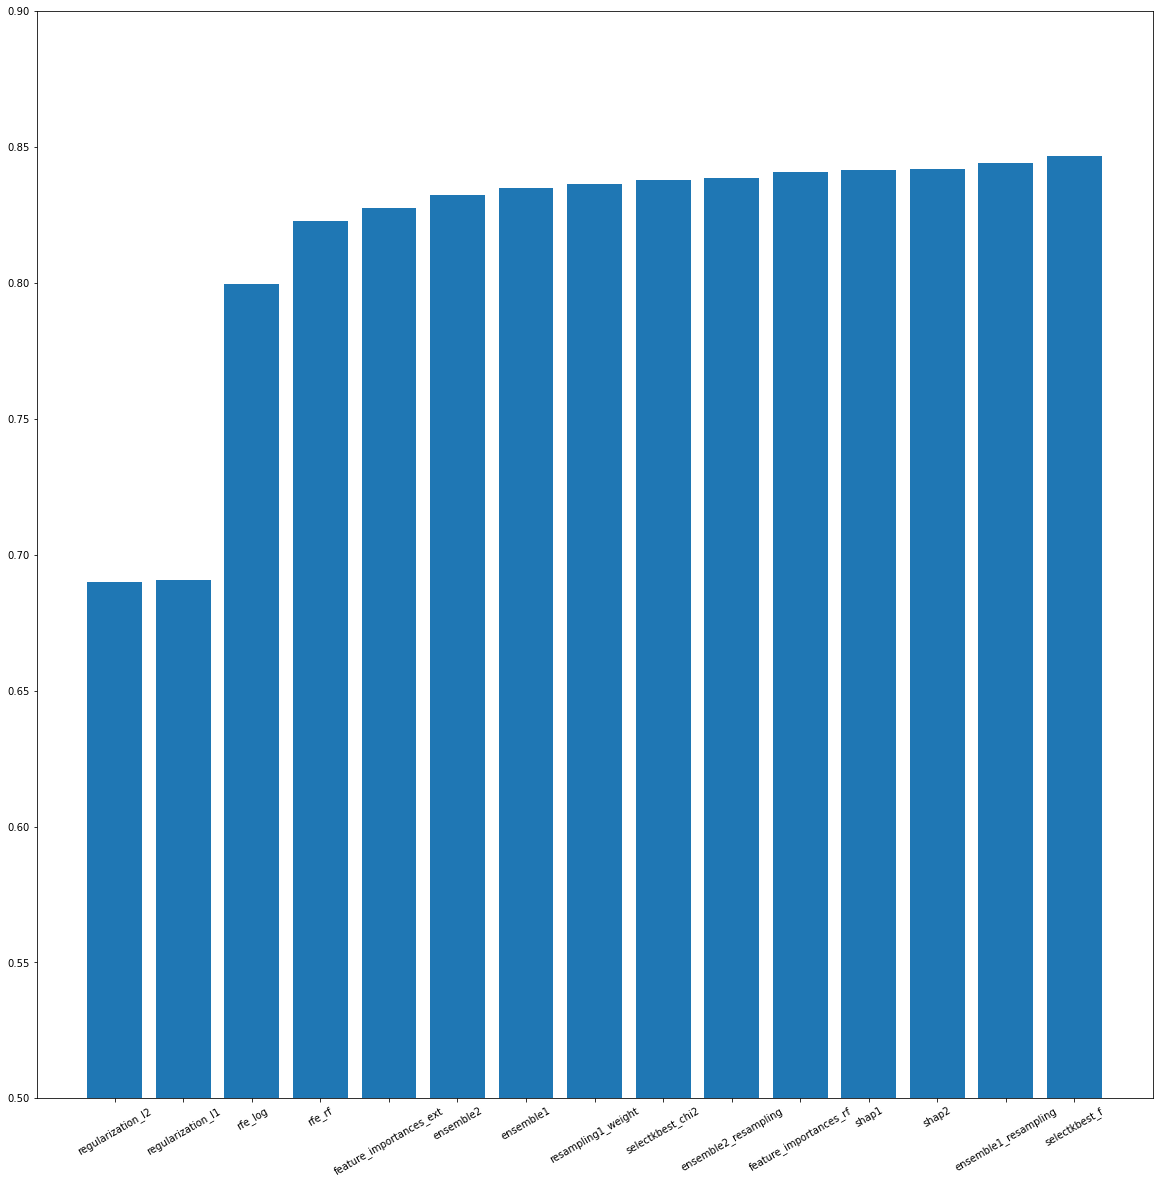

In [41]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1)
ax.set_xticklabels(validation_mean_sort, rotation = 30)
ax.bar(validation_mean_sort, np.sort(validation_mean.values))
plt.ylim(0.5,0.9)